# Installazioni ed import necessari

In [ ]:
!mkdir images/
!mkdir save_mat/

In [ ]:
!pip install lxml yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
!pip install pandas_ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 115 kB 13.1 MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=98dfd98706331c2fffcdd1f8b50eccead132539a5b4b5542b0bf3dce0a0a4931
  Stored in directory: /root/.cache/pip/wheels/0b/81/f0/cca85757840e4616a2c6b9fe12569d97d324c27cac60724c58
Successfully built pandas-ta


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta

In [ ]:
def get_categorical_tickers():
    '''
    This Function returns a dictionary of tickers for different industry types
    :return:
    ticker_dict: Dictionary of 9 different industry types with over 8 tickers each
    tickerSymbols: Set of three tickers
    '''
    ticker_dict = {}
    all_tickers = []
    ticker_dict['energy'] = ['XOM', 'CVX', 'SHEL', 'PTR', 'TTE', 'BP', 'PBR', 'SNP', 'SLB', 'VLO']
    ticker_dict['materials'] = ['BHP', 'LIN', 'RIO', 'DD', 'SHW', 'CTA-PB', 'APD']
    ticker_dict['industrials'] = ['UPS', 'HON', 'LMT', 'BA', 'GE', 'MMM', 'RTX', 'CAT', 'WM', 'ABB', 'ETN', 'EMR',
                                  'FDX', 'TRI']
    ticker_dict['utilities'] = ['NEE', 'DUK', 'NGG', 'AEP', 'XEL','AWK' ,'ETR', 'PCG']
    ticker_dict['healthcare'] = ['UNH', 'JNJ', 'PFE', 'NVO', 'TMO', 'MRK', 'AZN', 'NVS', 'DHR', 'AMGN', 'CVS', 'GSK',
                                 'ZTS', 'GILD']
    ticker_dict['financials'] = ['BRK-A', 'V', 'JPM', 'BAC', 'MA', 'WFC', 'C-PJ', 'MS', 'RY', 'AXP']
    ticker_dict['discretionary'] = ['AMZN', 'TSLA', 'HD', 'BABA', 'TM', 'NKE', 'MCD', 'SBUX', 'F', 'MAR', 'GM', 'ORLY',
                                     'HMC', 'CMG', 'HLT'] # tolgo 'LILI'
    ticker_dict['staples'] = ['WMT', 'PG', 'KO', 'COST', 'PEP', 'BUD', 'UL', 'TGT', 'MDLZ', 'CL', 'DG', 'KHC', 'KDP',
                              'HSY']
    ticker_dict['IT'] = ['AAPL', 'MSFT', 'TSM', 'NVDA', 'AVGO', 'CSCO', 'ORCL', 'ACN', 'ADBE', 'INTC', 'CRM', 'TXN',
                         'QCOM', 'AMD', 'IBM', 'SONY', 'AMAT', 'INFY', 'ADI', 'MU', 'LRCX']
    ticker_dict['communication'] = ['GOOG', 'DIS', 'VZ', 'CMCSA', 'TMUS', 'T', 'NFLX', 'SNAP', 'VOD',
                                    'TWTR', 'EA'] # rimuovo FB, BAIDU
    ticker_dict['estate'] = ['PLD', 'AMT', 'CCI', 'EQIX', 'SPG', 'DLR', 'WELL', 'EQR', 'AVB', 'WY', 'INVH', 'MAA']
    ticker_keys = []
    for key in ticker_dict.keys():
        ticker_keys.append(key)
        all_tickers.append(ticker_dict[key])
    ticker_dict['all'] = all_tickers
    tickerSymbols = ['BRK-A', 'GOOG', 'MSFT']
    return ticker_dict, tickerSymbols

def get_company_names():
    '''
    Get a dictionary of search strings corresponding to different ticker labels
    :return:
    ticker_dict: Dictionary of search strings given a stock ticker
    '''
    ticker_dict = {}
    all_tickers = []
    ticker_dict['energy'] = {'XOM': 'Exxon Mobil', 'CVX': 'Chevron', 'SHEL': 'Shell', 'PTR': 'PetroChina',
                             'TTE': 'TotalEnergies', 'BP': 'BP', 'PBR': 'Petroleo Brasileiro',
                             'SNP': 'China Petroleum', 'SLB': 'Schlumberger', 'VLO': 'Valero'}
    '''
    ticker_dict['materials'] = ['BHP', 'LIN', 'RIO', 'DD', 'SHW', 'CTA-PB', 'APD']
    ticker_dict['industrials'] = ['UPS', 'HON', 'LMT', 'BA', 'GE', 'MMM', 'RTX', 'CAT', 'WM', 'ABB', 'ETN', 'EMR',
                                  'FDX', 'TRI']
    ticker_dict['utilities'] = ['NEE', 'DUK', 'NGG', 'AEP', 'XEL','AWK' ,'ETR', 'PCG']
    ticker_dict['healthcare'] = ['UNH', 'JNJ', 'PFE', 'NVO', 'TMO', 'MRK', 'AZN', 'NVS', 'DHR', 'AMGN', 'CVS', 'GSK',
                                 'ZTS', 'GILD']
    ticker_dict['financials'] = ['BRK-A', 'V', 'JPM', 'BAC', 'MA', 'WFC', 'C-PJ', 'MS', 'RY', 'AXP']
    ticker_dict['discretionary'] = ['AMZN', 'TSLA', 'HD', 'BABA', 'TM', 'NKE', 'MCD', 'SBUX', 'F', 'MAR', 'GM', 'ORLY',
                                    'LILI', 'HMC', 'CMG', 'HLT']
    ticker_dict['staples'] = ['WMT', 'PG', 'KO', 'COST', 'PEP', 'BUD', 'UL', 'TGT', 'MDLZ', 'CL', 'DG', 'KHC', 'KDP',
                              'HSY']
    ticker_dict['IT'] = ['AAPL', 'MSFT', 'TSM', 'NVDA', 'AVGO', 'CSCO', 'ORCL', 'ACN', 'ADBE', 'INTC', 'CRM', 'TXN',
                         'QCOM', 'AMD', 'IBM', 'SONY', 'AMAT', 'INFY', 'ADI', 'MU', 'LRCX']
    ticker_dict['communication'] = ['GOOG', 'FB', 'DIS', 'VZ', 'CMCSA', 'TMUS', 'T', 'NFLX', 'SNAP', 'VOD', 'BAIDU',
                                    'TWTR', 'EA']
    ticker_dict['estate'] = ['PLD', 'AMT', 'CCI', 'EQIX', 'SPG', 'DLR', 'WELL', 'EQR', 'AVB', 'WY', 'INVH', 'MAA']
    ticker_keys = []
    for key in ticker_dict.keys():
        ticker_keys.append(key)
        all_tickers.append(ticker_dict[key])
    ticker_dict['all'] = all_tickers
    '''
    return ticker_dict

def cross_corr(a,b):
    '''
    Compute the cross-correlation between
    :param a: Time-series data of first stock
    :param b: Time-series data of second stock
    :return: Cross-correlation of the two stocks that are input
    '''
    return (a*b).sum()/((a**2).sum()*(b**2).sum())**0.5

def get_tick_values(tickerSymbol, start, end):
    '''
    Function to extract the time series data
    :param tickerSymbol: String of stock ticker
    :param start: String of starting date of the time-series data
    :param end: String of ending date of the time-series data
    :return: type(list): Time series data
    '''
    tickerData = yf.Ticker(tickerSymbol)
    tickerDf = yf.download(tickerSymbol, start=start, end=end)
    tickerDf = tickerDf['Adj Close']
    data = tickerDf
    return data.values

def get_control_vector(val):
    '''
    Returns the mask of day instances where stock purchase/sell decisions are to be made
    :param val: Input array of stock values
    :return: np.array of decisions maks labels (-2/0/2)
    '''
    return np.diff(np.sign(np.diff(val)))

def buy_and_sell_bot(val,controls):
    '''
    Returns the growth of investment over time as function of the input decision mask and the stock values
    :param val: np.array of the actual stock value over time
    :param controls: np.array of the control mask to make purchase/sell decisions
    :return: np.array of percentage growth value of the invested stock
    '''
    inv = []
    curr_val = 100
    inds = np.where(controls)[0]
    buy_inds = np.where(controls>0)[0]
    sell_inds = np.where(controls<0)[0]
    max_limit = sell_inds[-1] if sell_inds[-1]>buy_inds[-1] else buy_inds[-1]
    for i in range(buy_inds[0]+2):
        inv.append(curr_val)
    for i in range(buy_inds[0],max_limit+1):
        if controls[i]>0:
            buy_val = val[i+1]
        elif controls[i]<0:
            sell_val = val[i+1]
            curr_val = curr_val*sell_val/buy_val
        inv.append(curr_val)
    if max_limit+1!=len(controls):
        for i in range(len(controls)-max_limit-1):
            inv.append(curr_val)
    return inv



In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np

# LSTM

In [ ]:
class LSTM_Model():
    '''
    Class to train and infer stock price for one particular stock
    '''
    def __init__(self,tickerSymbol, start, end,
                 past_history = 60, forward_look = 1, train_test_split = 0.8, batch_size = 30,
                 epochs = 50, steps_per_epoch = 200, validation_steps = 50, verbose = 0, infer_train = True,
                 depth = 1, naive = False, values = 200, plot_values = True, plot_bot = True,
                 custom_loss = False):
        '''
        Initialize parameters for the class
        :param tickerSymbol: String of Ticker symbol to train on
        :param start: String of start date of time-series data
        :param end: String of end date of time-series data
        :param past_history: Int of past number of days to look at
        :param forward_look: Int of future days to predict at a time
        :param train_test_split: Float of fraction train-test split
        :param batch_size: Int of mini-batch size
        :param epochs: Int of total number of epochs in training
        :param steps_per_epoch: Int for total number of mini-batches to run over per epoch
        :param validation_steps: Int of total number of steps to use while validating with the dev set
        :param verbose: Int to decide to print training stage results
        :param infer_train: Flag to carry out prediction on training set
        :param depth: Int to decide depth of stacked LSTM
        :param naive: Flag for deciding if we need a Vanila model
        :param values: Int for number of days to predict for by iteratively updating the time-series histroy
        :param plot_values: Flag to plot
        :param plot_bot: Flag to plot the investment growth by the decision making bot
        :param custom_loss: Flag to decude if custom loss function needs to be applied
        '''
        self.tickerSymbol = tickerSymbol
        self.start = start
        self.end = end
        self.past_history = past_history
        self.forward_look = forward_look
        self.train_test_split = train_test_split
        self.batch_size = batch_size
        self.epochs = epochs
        self.steps_per_epoch = steps_per_epoch
        self.validation_steps = validation_steps
        self.verbose = verbose
        self.values = values
        self.depth = depth
        self.naive = naive
        self.plot_values = plot_values
        self.plot_bot = plot_bot
        self.infer_train = infer_train
        self.custom_loss = custom_loss
        tf.random.set_seed(1728)

    def custom_loss_def(self,y_true,y_pred):
        '''
        Definition of the custom loss function
        :param y_true: Np.array of true value
        :param y_pred: np.array of predicted value
        :return: Customised loss function as tf.tensor
        '''
        self.weights = np.float32(1.0 + 1.0*np.linspace(0,self.forward_look-1,self.forward_look)/200.0)
        return tf.math.reduce_mean(tf.math.square(tf.multiply(self.weights,y_true - y_pred)))

    def data_preprocess(self, dataset, iStart, iEnd, sHistory, forward_look=1):
        '''
        Preprocess the data to make either the test set or the train set
        :param dataset: np.array of time-series data
        :param iStart: int of index start
        :param iEnd: int of index end
        :param sHistory: int number of days in history that we need to look at
        :param forward_look: int of number of days in the future that needs to predicted
        :return: returns a list of test/train data
        '''
        self.data = []
        self.target = []
        iStart += sHistory
        if iEnd is None:
            iEnd = len(dataset) - forward_look + 1
        for i in range(iStart, iEnd):
            indices = range(i - sHistory, i)  # set the order
            if forward_look > 1:
                fwd_ind = range(i, i + forward_look)
                fwd_entity = np.asarray([])
                fwd_entity = np.append(fwd_entity, dataset[fwd_ind])
            reshape_entity = np.asarray([])
            reshape_entity = np.append(reshape_entity, dataset[
                indices])  # Comment this out if there are multiple identifiers in the feature vector
            self.data.append(np.reshape(reshape_entity, (sHistory, 1)))  #
            if forward_look > 1:
                self.target.append(np.reshape(fwd_entity, (forward_look, 1)))
            else:
                self.target.append(dataset[i])
        self.data = np.array(self.data)
        self.target = np.array(self.target)

    def plot_history_values(self):
        '''
        Plots time-series data of the chosen ticker
        '''
        tickerData = yf.Ticker(self.tickerSymbol)
        tickerDf = yf.download(self.tickerSymbol, start=self.start, end=self.end)
        tickerDf = tickerDf['Adj Close']
        data = tickerDf
        y = data
        y.index = data.index
        y.plot()
        plt.title(f"{self.tickerSymbol}")
        plt.ylabel("price")
        plt.show()

    def get_ticker_values(self):
        '''
        Get ticker values in a list
        '''
        tickerData = yf.Ticker(self.tickerSymbol)
        tickerDf = yf.download(self.tickerSymbol, start=self.start, end=self.end)
        tickerDf = tickerDf['Adj Close']
        data = tickerDf
        self.y = data.values

    def prepare_test_train(self):
        '''
        Create the dataset from the extracted time-series data
        '''
        training_size = int(self.y.size * self.train_test_split)
        training_mean = self.y[:training_size].mean()  # get the average
        training_std = self.y[:training_size].std()  # std = a measure of how far away individual measurements tend to be from the mean value of a data set.
        self.y = (self.y - training_mean) / training_std  # prep data, use mean and standard deviation to maintain distribution and ratios
        self.data_preprocess(self.y, 0, training_size, self.past_history, forward_look = self.forward_look)
        self.xtrain, self.ytrain = self.data, self.target
        self.data_preprocess(self.y, training_size, None, self.past_history, forward_look = self.forward_look)
        self.xtest, self.ytest = self.data, self.target

    def create_p_test_train(self):
        '''
        Prepare shuffled train and test data
        '''
        BATCH_SIZE = self.batch_size
        BUFFER_SIZE = self.y.size
        p_train = tf.data.Dataset.from_tensor_slices((self.xtrain, self.ytrain))
        self.p_train = p_train.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True).repeat()
        p_test = tf.data.Dataset.from_tensor_slices((self.xtest, self.ytest))
        self.p_test = p_test.batch(BATCH_SIZE).repeat()

    def model_LSTM(self):
        '''
        Create the stacked LSTM model and train it using the shuffled train set
        '''
        self.model = tf.keras.models.Sequential()
        if self.naive:
            self.model.add(tf.keras.layers.LSTM(20, input_shape = self.xtrain.shape[-2:]))
        else:
            self.model.add(tf.keras.layers.LSTM(20, return_sequences=True, input_shape = self.xtrain.shape[-2:]))
        for i in range(self.depth):
            self.model.add(tf.keras.layers.LSTM(20, return_sequences=True))
        if self.naive is False:
            self.model.add(tf.keras.layers.LSTM(20))
        self.model.add(tf.keras.layers.Dense(self.forward_look))
        if self.custom_loss:
            self.model.compile(optimizer='Adam',
                      loss=self.custom_loss_def, metrics=['mse','mae'])
        else:
            self.model.compile(optimizer='Adam',
                               loss='mse', metrics=['mse','mae'])

        self.create_p_test_train()
        self.hist = self.model.fit(self.p_train, epochs = self.epochs, steps_per_epoch = self.steps_per_epoch,
                  validation_data = self.p_test, validation_steps = self.validation_steps,
                  verbose = self.verbose)

    def infer_values(self, xtest, ytest, ts):
        '''
        Infer values by using the test set
        :param xtest: test dataset
        :param ytest: actual value dataset
        :param ts: tikcer symbol
        :return: model variables that store predicted data
        '''
        self.pred = []
        self.pred_update = []
        self.usetest = xtest.copy()
        if self.infer_train:
            self.pred_train = []
            self.pred_update_train = []
            self.usetest_train = self.xtrain.copy()
        for i in range(self.values):
            self.y_pred = self.model.predict(xtest[i,:,:].reshape(1,xtest.shape[1],xtest.shape[2]))[0][:]
            self.y_pred_update = self.model.predict(self.usetest[i,:,:].reshape(1,xtest.shape[1],xtest.shape[2]))[0][:]
            self.pred.append(self.y_pred)
            self.pred_update.append(self.y_pred_update)
            self.usetest[np.linspace(i+1,i+self.past_history-1,self.past_history-1,dtype=int),np.linspace(self.past_history-2,0,self.past_history-1,dtype=int),:] =  self.y_pred_update[0]
            if self.infer_train:
                self.y_pred_train = self.model.predict(self.xtrain[i, :, :].reshape(1, self.xtrain.shape[1], self.xtrain.shape[2]))[0][:]
                self.y_pred_update_train = \
                self.model.predict(self.usetest_train[i, :, :].reshape(1, self.xtrain.shape[1], self.xtrain.shape[2]))[0][:]
                self.pred_train.append(self.y_pred_train)
                self.pred_update_train.append(self.y_pred_update_train)
                self.usetest_train[np.linspace(i + 1, i + self.past_history - 1, self.past_history - 1, dtype=int),
                np.linspace(self.past_history - 2, 0, self.past_history - 1, dtype=int), :] = self.y_pred_update_train[0]
        self.pred = np.array(self.pred)
        self.pred_update = np.array(self.pred_update)
        self.RMS_error = self.hist.history['val_mse'][-1]
        self.RMS_error_train = self.hist.history['mse'][-1]
        self.MAE_error = self.hist.history['val_mae'][-1]
        self.MAE_error_train = self.hist.history['mae'][-1]
        if self.infer_train:
            self.pred = np.array(self.pred)
            self.pred_update_train = np.array(self.pred_update_train)
        if self.forward_look>1:
            self.RMS_error_update = (np.mean(((self.ytest[:self.values - 1, 0, 0] - self.pred_update[1:, 0]) / (
            self.ytest[:self.values - 1, 0, 0])) ** 2)) ** 0.5/self.batch_size
            if self.infer_train:
                self.RMS_error_update_train = (np.mean(((self.ytrain[:self.values - 1, 0, 0] - self.pred_update_train[1:, 0]) / (
                    self.ytrain[:self.values - 1, 0, 0])) ** 2)) ** 0.5/self.batch_size
        else:
            self.RMS_error_update = (np.mean(
                ((self.ytest[:self.values - 1] - self.pred_update[1:]) / (self.ytest[:self.values - 1])) ** 2)) ** 0.5/self.batch_size
            if self.infer_train:
                self.RMS_error_update_train = (np.mean(((self.ytrain[:self.values - 1] - self.pred_update_train[1:]) / (
                    self.ytrain[:self.values - 1])) ** 2)) ** 0.5/self.batch_size

    def plot_test_values(self):
        '''
        Plot predicted values against actual values
        '''
        plt.figure()
        if self.forward_look>1:
            plt.plot(self.yt[:self.values-1,0,0],label='actual (%s)'%self.ts)
            plt.plot(self.pred[1:,0],label='predicted (%s)'%self.ts)
            plt.plot(self.pred_update[1:,0],label='predicted (update)')
            plt.xlabel("Days")
            plt.ylabel("Normalized stock price")
            plt.title('The relative RMS error is %f' % self.RMS_error)
            plt.legend()
            plt.savefig('images/Stock_prediction_%d_%d_%d_%d_%s_%s.png' % (
            self.depth, int(self.naive), self.past_history, self.forward_look, self.ts, int(self.custom_loss)))
            plt.clf()
            plt.figure()
            plt.plot(self.pred[1:, 0]-self.pred_update[1:,0], label='difference (%s)' % self.ts)
            plt.xlabel("Days")
            plt.ylabel("Prediction difference")
            plt.savefig('images/Difference_%d_%d_%d_%d_%s_%s.png' % (
            self.depth, int(self.naive), self.past_history, self.forward_look, self.ts, int(self.custom_loss)))
            plt.clf()
            np.savez('save_mat/store_%d_%d_%d_%d_%s_%s.png'%(
            self.depth,int(self.naive), self.past_history, self.forward_look, self.ts, int(self.custom_loss)),
            y = self.yt[:self.values-1,0,0],pred = self.pred[1:,0],pred_up = self.pred_update[1:,0])
        else:
            plt.plot(self.yt[:self.values-1],label='actual (%s)'%self.ts)
            plt.plot(self.pred[1:],label='predicted (%s)'%self.ts)
            #plt.plot(self.pred_update[1:],label='predicted (update)')
            plt.xlabel("Days")
            plt.ylabel("Normalized stock price")
            plt.title('The relative RMS error is %f' % self.RMS_error)
            plt.legend()
            plt.savefig('images/Stock_prediction_%d_%d_%d_%d_%s_%s.png'%(
            self.depth,int(self.naive), self.past_history, self.forward_look, self.ts, int(self.custom_loss)))
            plt.clf()
            plt.figure()
            plt.plot(self.pred[1:] - self.pred_update[1:], label='difference (%s)' % self.ts)
            plt.xlabel("Days")
            plt.ylabel("Prediction difference")
            plt.savefig('images/Difference_%d_%d_%d_%d_%s_%s.png' % (
            self.depth, int(self.naive), self.past_history, self.forward_look, self.ts, int(self.custom_loss)))
            plt.clf()
            np.savez('save_mat/store_%d_%d_%d_%d_%s_%s.png' % (
            self.depth, int(self.naive), self.past_history, self.forward_look, self.ts, int(self.custom_loss)),
            y=self.yt[:self.values - 1], pred=self.pred[1:], pred_up=self.pred_update[1:])
        print('The relative test RMS error is %f'%self.RMS_error)
        print('The relative test MAE is %f' % self.MAE_error)
        print('The relative test RMS error for the updated dataset is %f' % self.RMS_error_update)
        if self.infer_train:
            print('The relative train RMS error is %f' % self.RMS_error_train)
            print('The relative train MAE is %f' % self.MAE_error_train)
            print('The relative train RMS error for the updated dataset is %f' % self.RMS_error_update_train)
            
    def arch_plot(self):
        '''
        Plot the network architecture
        '''
        dot_img_file = 'images/LSTM_arch_depth%d_naive%d.png' %( self.depth, int(self.naive))
        tf.keras.utils.plot_model(self.model, to_file=dot_img_file, show_shapes=True)
    

    def full_workflow(self, model = None):
        '''
        Workflow to carry out the entire process end-to-end
        :param model: Choose which model to use to predict inferred values
        :return:
        '''
        self.get_ticker_values()
        self.prepare_test_train()
        self.model_LSTM()
        if model is None:
            self.xt = self.xtest
            self.yt = self.ytest
            self.ts = self.tickerSymbol
        else:
            self.xt = model.xtest
            self.yt = model.ytest
            self.ts = model.tickerSymbol
        self.infer_values(self.xt, self.yt, self.ts)
        # self.arch_plot()

    def full_workflow_and_plot(self, model = None):
        '''
        Workflow to carry out the entire process end-to-end
        :param model: Choose which model to use to plot inferred values
        :return:
        '''
        self.full_workflow(model = model)
        self.plot_test_values()
        

    def plot_bot_decision(self):
        '''
        calculate investment growth from the inferred prediction value and plot the resulting growth
        '''
        if self.forward_look > 1:
            ideal = self.yt[:self.values - 1, 0, 0]
            pred = np.asarray(self.pred[1:, 0]).reshape(-1,)
            pred_update = np.asarray(self.pred_update[1:, 0]).reshape(-1,)
        else:
            ideal = self.yt[:self.values - 1]
            pred = np.asarray(self.pred[1:]).reshape(-1,)
            pred_update = np.asarray(self.pred_update[1:]).reshape(-1,)
        control_ideal = get_control_vector(ideal)
        control_pred = get_control_vector(pred)
        control_pred_update = get_control_vector(pred_update)
        bot_ideal = buy_and_sell_bot(ideal, control_ideal)
        bot_pred = buy_and_sell_bot(ideal, control_pred)
        bot_pred_update = buy_and_sell_bot(ideal, control_pred_update)
        plt.figure()
        plt.plot(bot_ideal, label='Ideal case (%.2f)'%bot_ideal[-1])
        plt.plot(bot_pred, label='From prediction (%.2f)'%bot_pred[-1])
        plt.plot(bot_pred_update, label='From prediction (updated) (%.2f)'%bot_pred_update[-1])
        plt.plot(ideal / ideal[0] * 100.0, label='Stock value(%s)' % self.ts)
        plt.xlabel("Days")
        plt.ylabel("Percentage growth")
        plt.legend()
        plt.savefig('images/Bot_prediction_%d_%d_%d_%d_%s_%s.png' % (self.depth, int(self.naive), self.past_history, self.forward_look, self.ts, int(self.custom_loss)))
        np.savez('save_mat/bot_%d_%d_%d_%d_%s_%s.png' % (
        self.depth, int(self.naive), self.past_history, self.forward_look, self.ts, int(self.custom_loss)),
        ideal = bot_ideal, pred  = bot_pred, pred_up = bot_pred_update)
        plt.clf()


    def get_predicted_values(self):
      return self.xt, self.yt, self.pred, self.pred_update

# Funzione Investimento


In [ ]:
def calculate_investment(dataset ,initial_investment=1_000):
  '''
  Return the final value of investment
  '''
  open_close_prices = dataset[['Open', 'Close']]
  decisions = dataset['operation'] # if 1 -> buy, else sell
  total_cash = initial_investment
  price_decision = 1

  #creo il dizionario di analisi
  stats = {}
  stats['cash invested'] = []
  stats['Buy at'] = []
  stats['Close at'] = []
  stats['n stock buyed'] = []
  stats['Bot decision'] = []
  stats['cash returned'] = []



  # per le operazioni buy
  for i in open_close_prices.index:
    
    open_price = open_close_prices['Open'].loc[i]
    close_price = open_close_prices['Close'].loc[i]
    if(decisions.loc[i] == 1):
      #print(f'\nBuy {n_stock} stock for {open_price}')
      # a fine giornata chiudo la posizione aperta in precedenza
      price_decision = close_price
      price_open_operation = open_price
      #print(f'Close with return at {cash}')
    else:
      # se decision sell
      price_decision = open_price
      price_open_operation = close_price

    n_stock = total_cash / price_open_operation
    cash = n_stock * price_decision

    stats['cash invested'].append(total_cash)
    stats['Buy at'].append(open_price)
    stats['Close at'].append(close_price)
    stats['n stock buyed'].append(n_stock)
    stats['Bot decision'].append(decisions.loc[i])
    stats['cash returned'].append(cash)
    
    total_cash = cash


  return total_cash, stats


# TEST

In [ ]:
start = '2010-01-01'
end = '2022-08-01'

In [ ]:
stock = 'AAPL'

## Test su unico titolo

In [ ]:
df = yf.download('AAPL', start, end)

[*********************100%***********************]  1 of 1 completed


In [ ]:
split = 0.8747
index = int(len(df)*split)
df.iloc[index]

Open         1.340800e+02
High         1.347400e+02
Low          1.317200e+02
Close        1.326900e+02
Adj Close    1.313335e+02
Volume       9.911660e+07
Name: 2020-12-31 00:00:00, dtype: float64

In [ ]:
diz = {}
diz['stock'] = []
diz['roi'] = []
diz['gain'] = []


# scarico i dati
df = yf.download(stock, start, end)

index = int(len(df)*split)
values = df.iloc[index:].shape[0]
# creo il modello
LSTM_1 = LSTM_Model(tickerSymbol = stock , start = start, end = end, depth = 0, epochs=50, values=252, naive = True, verbose = True, train_test_split=0.8747) 
LSTM_1.full_workflow()

xt, yt, pred, pred_update = LSTM_1.get_predicted_values()
df_test = df[index:index+pred.shape[0]].copy()

pred_r = pd.Series(pred.reshape(-1), index=df_test.index)
df_test['pred'] = pred_r

mean_open = df[:index].Open.mean()
std_open = df[:index].Open.std()

open_norm = (df_test.Open - mean_open) / std_open
df_test['open_norm'] = open_norm
df_test['operation'] = np.where(df_test['pred'] > df_test['open_norm'], 1, 0 )
tot, stats = calculate_investment(df_test,df_test.Open.iloc[0])

roi = (tot - df_test.Open.iloc[0])/ df_test.Open.iloc[0]

diz['stock'].append(stock)
diz['roi'].append(roi)
diz['gain'].append(tot)



In [ ]:
pred.shape

(252, 1)

In [ ]:
df_test.shape

(252, 9)

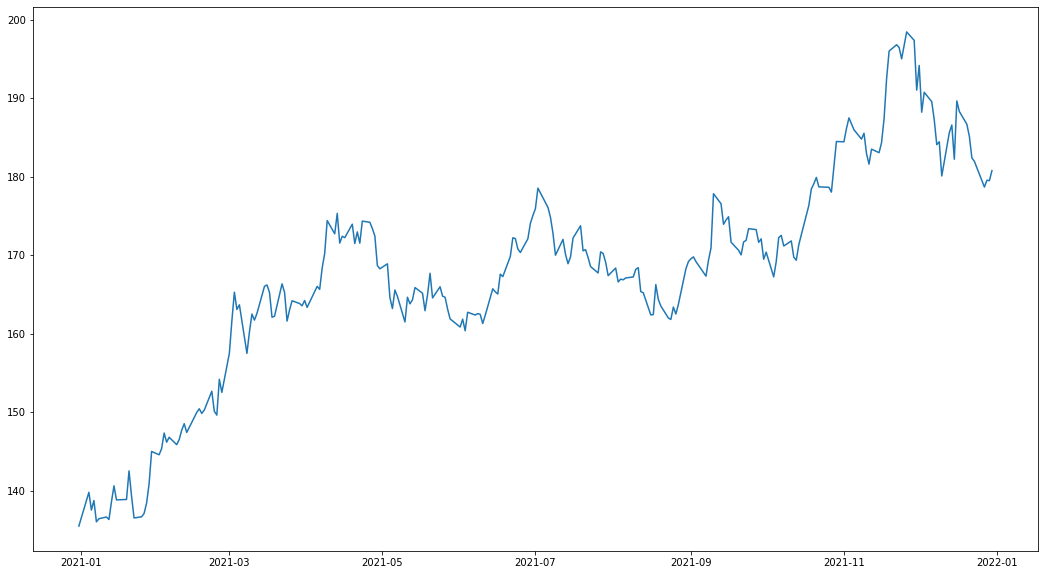

In [ ]:
plt.figure(figsize=(18,10))
plt.plot(df_test.index,pd.DataFrame(stats)['cash returned'].values)

In [ ]:
pd.DataFrame(diz)

,stock,roi,gain
0,AAPL,0.348156,180.76071


## Test su più titoli

In [ ]:
# prelevo i dati
td, _ = get_categorical_tickers()
td.pop('all')
diz = {}
diz['stock'] = []
diz['roi'] = []
diz['gain'] = []

for k in td.keys():

  for stock in td[k][:3]:
    # scarico i dati
    df = yf.download(stock, start, end)

    split = 0.8967
    index = int(len(df)*split)
    values = df.iloc[index:].shape[0]
    # creo il modello
    LSTM_1 = LSTM_Model(tickerSymbol = stock , start = start, end = end, depth = 0, epochs=50, values=252, naive = True, verbose = True, train_test_split=0.8747)
    LSTM_1.full_workflow()

    xt, yt, pred, pred_update = LSTM_1.get_predicted_values()
    df_test = df[index:index+pred.shape[0]].copy()

    pred_r = pd.Series(pred.reshape(-1), index=df_test.index)
    df_test['pred'] = pred_r

    mean_open = df[:index].Open.mean()
    std_open = df[:index].Open.std()

    open_norm = (df_test.Open - mean_open) / std_open
    df_test['open_norm'] = open_norm
    df_test['operation'] = np.where(df_test['pred'] > df_test['open_norm'], 1, 0 )
    tot, stats = calculate_investment(df_test,df_test.Open.iloc[0])

    roi = (tot - df_test.Open.iloc[0])/ df_test.Open.iloc[0]

    diz['stock'].append(stock)
    diz['roi'].append(roi)
    diz['gain'].append(tot)



In [ ]:
pd.DataFrame(diz).sort_values(by='roi').tail(20)

,stock,roi,gain
31,AMT,0.027956,249.937226
25,MSFT,0.052546,271.009504
22,PG,0.054642,142.925093
30,PLD,0.059348,117.185067
1,CVX,0.068860,109.718462
18,AMZN,0.070713,182.237433
21,WMT,0.071516,149.069231
14,PFE,0.103286,41.009120
8,LMT,0.118178,433.182220
10,DUK,0.146679,112.707099


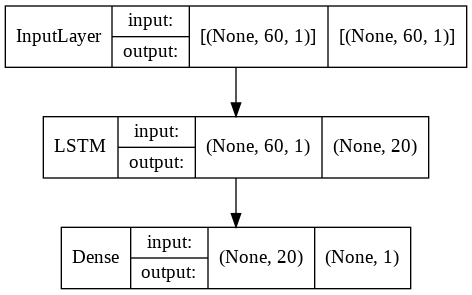

In [ ]:
tf.keras.utils.plot_model(
    LSTM_1.model,
    #to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=False,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
)

## Test su liste di titoli a scelta

In [ ]:
stock_list_exam = ['^GSPC', '^FTSE', '^GDAXI','AAPL'] # '^NSEI',

In [ ]:
stock_list_exam = ['NEE', 'BRK-A', 'UPS', 'JNJ', 'NGG', 'GOOG', 'XOM', 'BHP', 'RIO', 'AAPL']

In [ ]:
stock_list_exam = ['AAPL']

In [ ]:
start = '2010-01-01'
end = '2022-08-01'

In [ ]:

diz = {}
diz['stock'] = []
diz['roi'] = []
diz['gain'] = []
diz['initial_investment'] = []
diz['RMS_train'] = []
diz['RMS'] = []



for stock in stock_list_exam:
  # scarico i dati
  df = yf.download(stock, start, end)

  split = 0.8967
  index = int(len(df)*split)
  values = df.iloc[index:].shape[0]
  # creo il modello
  LSTM_1 = LSTM_Model(tickerSymbol = stock , start = start, end = end, depth = 0, epochs=50, values=252, naive = True, verbose = True, train_test_split=0.8747)
  LSTM_1.full_workflow_and_plot()

  error = LSTM_1.RMS_error
  error_train = LSTM_1.RMS_error_train

  xt, yt, pred, pred_update = LSTM_1.get_predicted_values()
  df_test = df[index:index+pred.shape[0]].copy()

  pred_r = pd.Series(pred.reshape(-1), index=df_test.index)
  df_test['pred'] = pred_r

  mean_open = df[:index].Open.mean()
  std_open = df[:index].Open.std()

  open_norm = (df_test.Open - mean_open) / std_open
  df_test['open_norm'] = open_norm
  df_test['operation'] = np.where(df_test['pred'] > df_test['open_norm'], 1, 0 )
  tot, stats = calculate_investment(df_test,df_test.Open.iloc[0])

  roi = (tot - df_test.Open.iloc[0])/ df_test.Open.iloc[0]

  diz['stock'].append(stock)
  diz['initial_investment'].append(df_test.Open.iloc[0])
  diz['roi'].append(roi)
  diz['gain'].append(tot)
  diz['RMS_train'].append(error_train)
  diz['RMS'].append(error)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Epoch 1/50
200/200 [==============================] - 4s 16ms/step - loss: 0.1227 - mse: 0.1227 - mae: 0.1883 - val_loss: 0.2834 - val_mse: 0.2834 - val_mae: 0.4446
Epoch 2/50
200/200 [==============================] - 2s 12ms/step - loss: 0.0043 - mse: 0.0043 - mae: 0.0335 - val_loss: 0.1403 - val_mse: 0.1403 - val_mae: 0.2971
Epoch 3/50
200/200 [==============================] - 3s 15ms/step - loss: 0.0030 - mse: 0.0030 - mae: 0.0286 - val_loss: 0.1024 - val_mse: 0.1024 - val_mae: 0.2560
Epoch 4/50
200/200 [==============================] - 2s 12ms/step - loss: 0.0028 - mse: 0.0028 - mae: 0.0275 - val_loss: 0.0872 - val_mse: 0.0872 - val_mae: 0.2410
Epoch 5/50
200/200 [==============================] - 2s 12ms/step - loss: 0.0025 - mse: 0.0025 - mae: 0.0267 - val_loss: 0.0668 - val_mse: 0.0668 - val_mae: 0.2114
Epoch 6/50
200/200 [=================

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
pd.DataFrame(diz)

,stock,roi,gain,initial_investment,RMS_train,RMS
0,NEE,0.159492,91.066501,78.540001,0.000944,0.009159
1,BRK-A,0.173268,472579.320509,402789.000000,0.001469,0.140547
2,UPS,0.181034,211.192570,178.820007,0.002528,0.293204
3,JNJ,0.183773,186.834886,157.830002,0.001294,0.011469
4,NGG,0.212837,74.346937,61.299999,0.003502,0.032659
5,GOOG,0.242602,141.355949,113.758003,0.001350,0.520403
6,XOM,0.376176,77.630067,56.410000,0.005853,0.108972
7,BHP,0.400629,88.898062,63.470116,0.006177,0.027102
8,RIO,0.492286,119.382843,80.000000,0.005735,0.145113
9,AAPL,0.687599,227.724555,134.940002,0.001435,0.124505


Text(0, 0.5, 'RMS error')

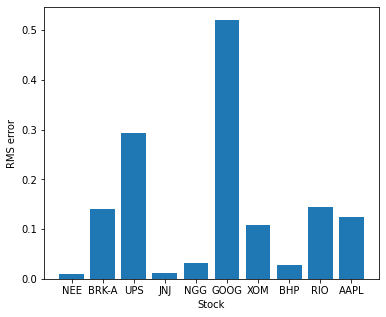

In [ ]:
plt.figure(figsize=(6,5))
plt.bar(diz['stock'],diz['RMS'])
#plt.bar(diz['stock'],diz['RMS_train'])
plt.xlabel('Stock')
plt.ylabel('RMS error')

In [ ]:
stock = 'AAPL'
start = '2010-01-01'
end = '2022-08-01'

In [ ]:
df = yf.download(stock, start, end)

split = 0.8967
index = int(len(df)*split)
values = df.iloc[index:].shape[0]
# creo il modello
LSTM_1 = LSTM_Model(tickerSymbol = stock , start = start, end = end, depth = 0, epochs=50, values=252, naive = True, verbose = True, train_test_split=0.8747)
LSTM_1.full_workflow()

xt, yt, pred, pred_update = LSTM_1.get_predicted_values()
df_test = df[index:index+pred.shape[0]].copy()

pred_r = pd.Series(pred.reshape(-1), index=df_test.index)
df_test['pred'] = pred_r

mean_open = df[:index].Open.mean()
std_open = df[:index].Open.std()

open_norm = (df_test.Open - mean_open) / std_open
df_test['open_norm'] = open_norm
df_test['operation'] = np.where(df_test['pred'] > df_test['open_norm'], 1, 0 )
initial_investment = df_test.Open.iloc[0]

tot, stats = calculate_investment(df_test,initial_investment)



roi = (tot - initial_investment)/ initial_investment

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Epoch 1/50
200/200 [==============================] - 4s 14ms/step - loss: 0.1585 - mse: 0.1585 - mae: 0.1914 - val_loss: 1.9552 - val_mse: 1.9552 - val_mae: 1.2495
Epoch 2/50
200/200 [==============================] - 2s 12ms/step - loss: 0.0053 - mse: 0.0053 - mae: 0.0419 - val_loss: 1.5200 - val_mse: 1.5200 - val_mae: 1.0709
Epoch 3/50
200/200 [==============================] - 2s 12ms/step - loss: 0.0037 - mse: 0.0037 - mae: 0.0338 - val_loss: 1.2707 - val_mse: 1.2707 - val_mae: 0.9698
Epoch 4/50
200/200 [==============================] - 2s 12ms/step - loss: 0.0035 - mse: 0.0035 - mae: 0.0326 - val_loss: 1.0179 - val_mse: 1.0179 - val_mae: 0.8572
Epoch 5/50
200/200 [==============================] - 3s 17ms/step - loss: 0.0032 - mse: 0.0032 - mae: 0.0309 - val_loss: 0.7810 - val_mse: 0.7810 - val_mae: 0.7278
Epoch 6/50
200/200 [=================

In [ ]:
roi

0.6875985708348161

In [ ]:
df_stats = pd.DataFrame(stats)

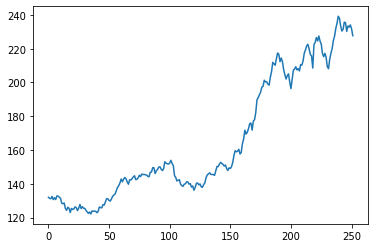

In [ ]:
df_stats['cash returned'].plot()